In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 7)

Las “features” o características que utilizaremos como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos (por ej. Hombre/Mujer o Ciencia Ficción, Terror, Novela,etc) se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real” -como en el caso de géneros de película o libros-. Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. ** No conviene utilizar features que estén correlacionados o que sean escalares de otros. **


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.columns = ['customerID', 'gender', 'age', 'annual_income', 'spending_score']
df.head()

,customerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 0, 'spending_score')

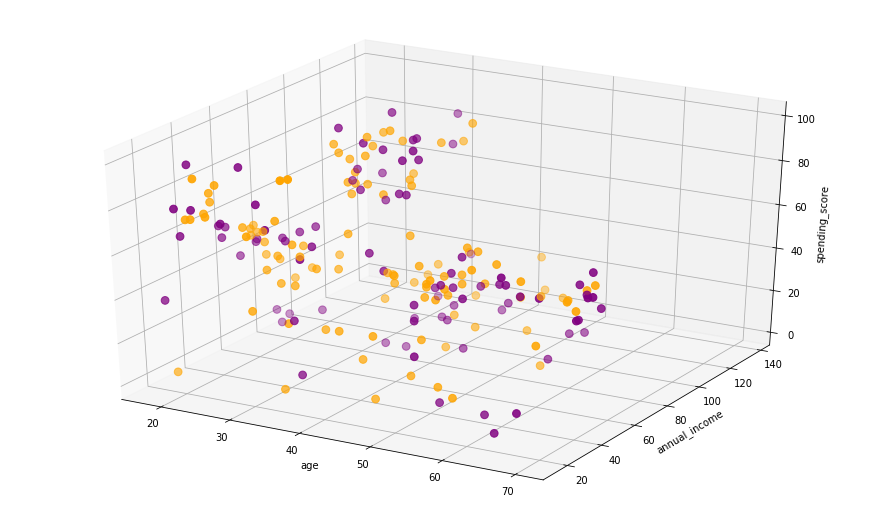

In [3]:
df['color'] = np.where(df['gender'] == 'Male', 'purple', 'orange')
X = np.array(df[["age","annual_income","spending_score"]])
y = np.array(df['color'])

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,s=60)

ax.set_xlabel('age')
ax.set_ylabel('annual_income')
ax.set_zlabel('spending_score')

# Elbow curve

Elbow curve o regla del codo para identificar el número de clusters óptimo usando Kmeans. Para ejecutar la regla del codo iteramos por varios número de clusters (de 1 a 20) obteniendo el score (valores de inercia) para cada clusterización. La inercia se de fine como la suma de las distancia de cada muestra a su centroide:

$$ Inercia = \sum_{i=1}^{N} ||(x_i - \mu) ||^2 $$

Siendo N el número de muestras para un cluster y $\mu$ su centroinde.

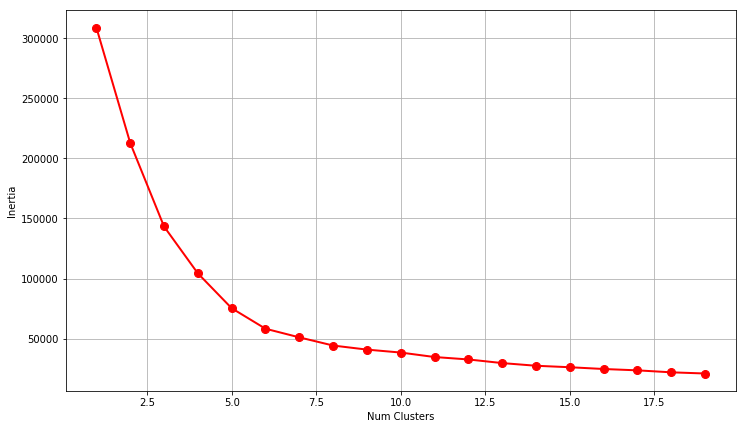

In [4]:
inertia_clusters = list()

for i in range(1, 20, 1):
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_clusters.append([i, kmeans.inertia_])
    
x, y = zip(*[inertia for inertia in inertia_clusters])
plt.plot(x, y, 'ro-', markersize=8, lw=2)
plt.grid(True)
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.show()

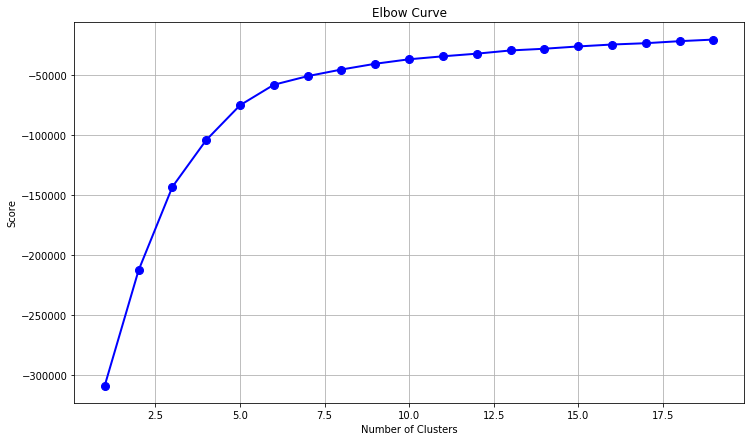

In [5]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score, 'bo-',markersize=8, lw=2)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Dendrograma

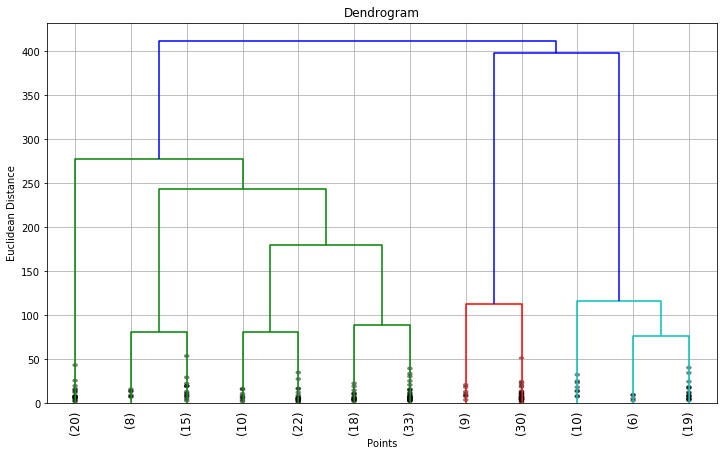

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, metric='euclidean', method='ward')

plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')
plt.grid(True)

# Generate Dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)

plt.show()

## Gap

Este método consiste en calcular la máxima distancia entre las diferentes ramas del dendrograma.

In [7]:
len(Z)

199

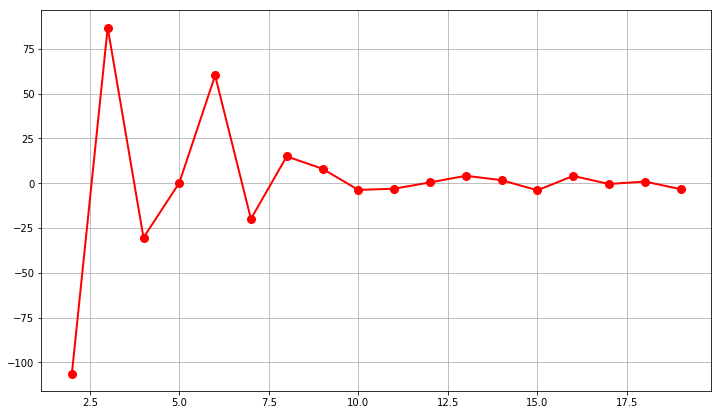

In [8]:
# Obtain the last 10 distances between points
last = Z[-20:, 2]
num_clustres = np.arange(1, len(last) + 1)

# Calculate Gap
gap = np.diff(last, n=2)  # second derivative
plt.plot(num_clustres[:-2] + 1, gap[::-1], 'ro-', markersize=8, lw=2)
plt.grid(True)
plt.show()

** Aplicando los tres métodos, el número de clusters óptimo puede ser 3 o 6**

# Number of clusters = 6

In [9]:
kmeans = KMeans(n_clusters=6).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 32.69230769  86.53846154  82.12820513]
 [ 27.          56.65789474  49.13157895]
 [ 41.68571429  88.22857143  17.28571429]
 [ 44.14285714  25.14285714  19.52380952]
 [ 56.15555556  53.37777778  49.08888889]
 [ 25.27272727  25.72727273  79.36363636]]


Text(0.5, 0, 'spending_score')

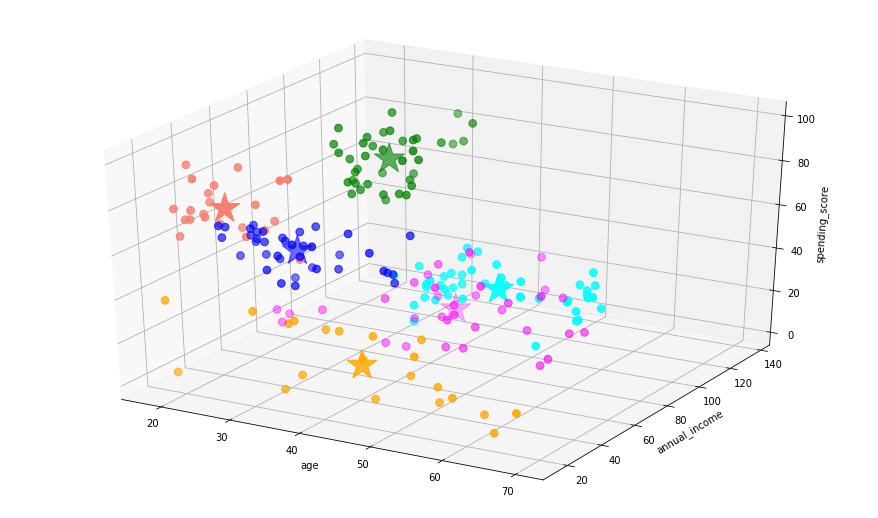

In [10]:
# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['green','blue','magenta', 'orange', 'cyan', 'salmon']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

ax.set_xlabel('age')
ax.set_ylabel('annual_income')
ax.set_zlabel('spending_score')

### Scatter plots 2D 

Text(0, 0.5, 'annual_income')

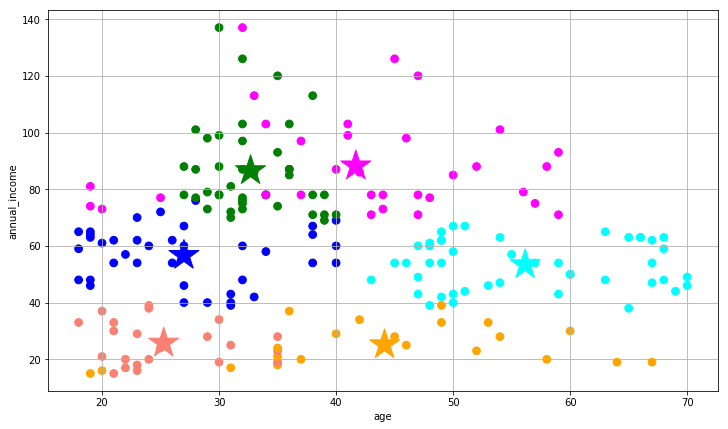

In [11]:
colores=['green','blue','magenta', 'orange', 'cyan', 'salmon']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig,ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], c=asignar, s=60)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.grid(True)

ax.set_xlabel('age')
ax.set_ylabel('annual_income')

Text(0, 0.5, 'spending_score')

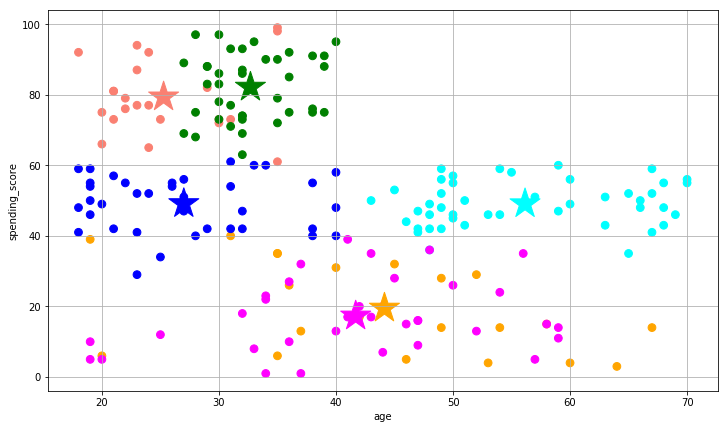

In [12]:
colores=['green','blue','magenta', 'orange', 'cyan', 'salmon']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig,ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 2], c=asignar, s=60)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.grid(True)

ax.set_xlabel('age')
ax.set_ylabel('spending_score')

Text(0, 0.5, 'spending_score')

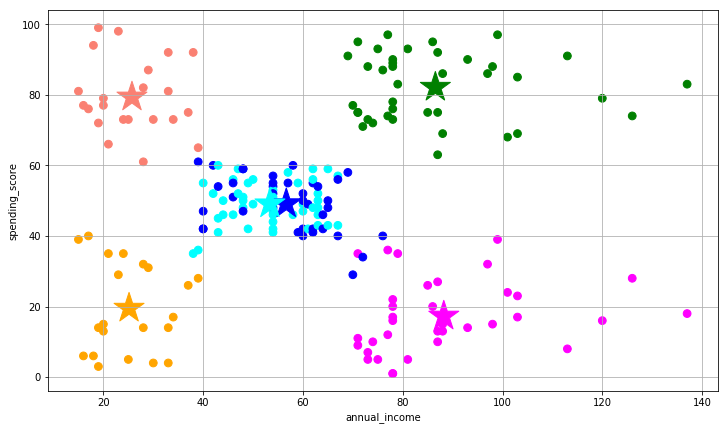

In [13]:
colores=['green','blue','magenta', 'orange', 'cyan', 'salmon']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig,ax = plt.subplots()

plt.scatter(X[:, 1], X[:, 2], c=asignar, s=60)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.grid(True)

ax.set_xlabel('annual_income')
ax.set_ylabel('spending_score')

# Number of clusters = 3

In [14]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 40.39473684  87.          18.63157895]
 [ 40.32520325  44.15447154  49.82926829]
 [ 32.69230769  86.53846154  82.12820513]]


Text(0.5, 0, 'spending_score')

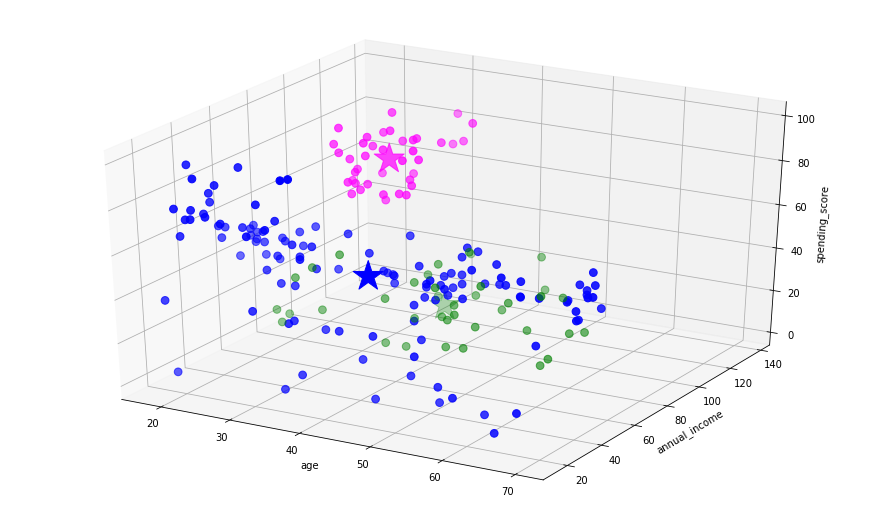

In [15]:
# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['green','blue','magenta']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

ax.set_xlabel('age')
ax.set_ylabel('annual_income')
ax.set_zlabel('spending_score')

Text(0, 0.5, 'annual_income')

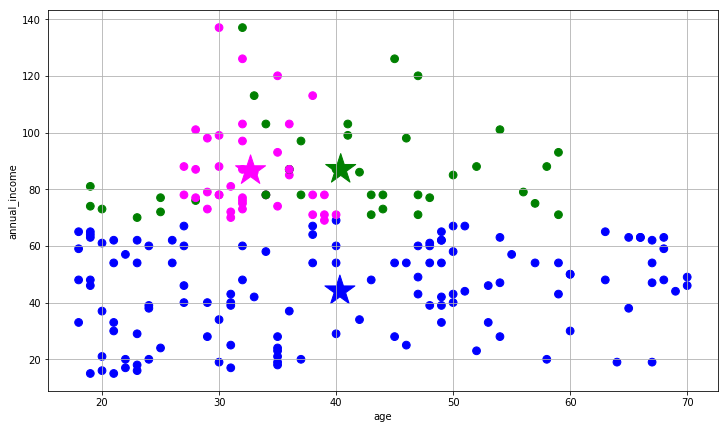

In [16]:
colores=['green','blue','magenta']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig,ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], c=asignar, s=60)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.grid(True)

ax.set_xlabel('age')
ax.set_ylabel('annual_income')


Text(0, 0.5, 'spending_score')

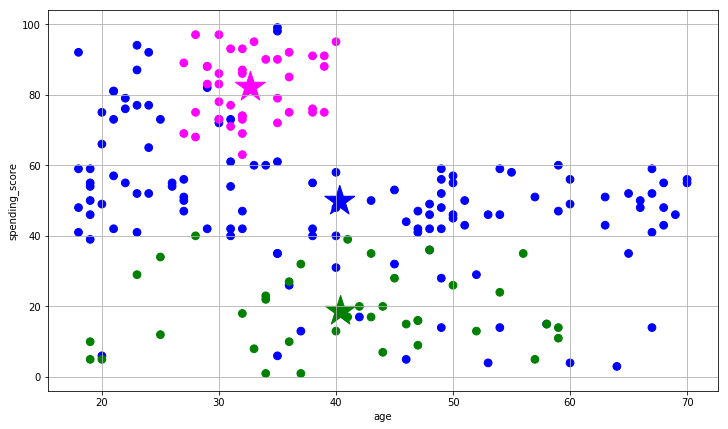

In [17]:
colores=['green','blue','magenta']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig,ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 2], c=asignar, s=60)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.grid(True)

ax.set_xlabel('age')
ax.set_ylabel('spending_score')

Text(0, 0.5, 'spending_score')

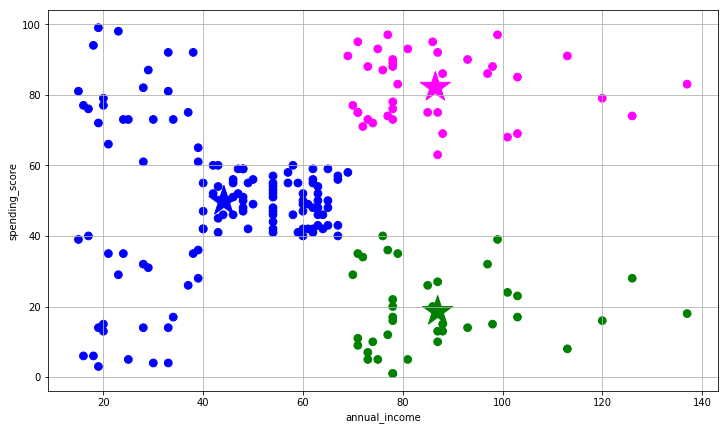

In [18]:
colores=['green','blue','magenta']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig,ax = plt.subplots()

plt.scatter(X[:, 1], X[:, 2], c=asignar, s=60)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.grid(True)

ax.set_xlabel('annual_income')
ax.set_ylabel('spending_score')

### Refs

- https://jarroba.com/seleccion-del-numero-optimo-clusters/
